###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2021 Semester 1

## Assignment 1: Pose classification with naive Bayes


##### **000833450**     `PLEASE ENTER YOUR ID(S) HERE`


This iPython notebook is a template which you will use for your Assignment 1 submission.

Marking will be applied on the four functions that are defined in this notebook, and to your responses to the questions at the end of this notebook (Submitted in a separate PDF file).

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

You may change the prototypes of these functions, and you may write other functions, according to your requirements. We would appreciate it if the required functions were prominent/easy to find.

**Adding proper comments to your code is MANDATORY. **

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
# ProbabilityOfXiGivenCj

X = []
y = []
    
def readDataIn(X, y):
    
    # read in the csv
    with open('COMP30027_2021_assignment1_data/train.csv', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        # append the rows
        for row in reader:
            # split the row by commas
            rowList = row[0].split(',')
            X.append(rowList[1:len(rowList)]) #all atts, excluding the class
            y.append(rowList[0])
    return X,y

def removeInstancesWithLessthan15Attributes(X,y):
    # iterate over the rows and remove any instances that dont have moret han 15 well defined attributes.
    XWellDefined = []
    yWellDefined = []
    # holds index of old X, y
    j = 0
    i =0
    #iterate over each row
    for row in X:
        # iterate over each attribute
        numberOfNotWellDefinedAttributes = 0
        for attribute in row:
            
            # if the attribute is not well defined
            if(attribute == '9999'):
                
                #increase the number of not well define attributes for this instance
                numberOfNotWellDefinedAttributes =numberOfNotWellDefinedAttributes +1
                
        # if the number of not well defined attributes is less than 16 include the instance 
        if(numberOfNotWellDefinedAttributes <16):
            XWellDefined.append(X[j])
            yWellDefined.append(y[j])
            i+=1
        j+=1
    return XWellDefined, yWellDefined
                
# This function should prepare the data by reading it from a file and converting it into a useful format for training and testing
def preprocess():
    X = []
    y = []
    X, y = readDataIn(X, y)
    # remove instances that have less than 15 attributes that are well defined
    X, y = removeInstancesWithLessthan15Attributes(X,y)
  
    return X, y
    
    
X, y = preprocess()
for i in range(0, len(X)):
    X[i].append(y[i])
    


In [2]:
# This function should calculate prior probabilities and likelihoods from the training data and using
# them to build a naive Bayes model

PDFs = []

def calculatePDFOfEachAttribute(X):
    # iterate over each attribute
    listOfDistributions = list()
    for i in range(0, len(X[0])-1):

        # calculate the mean of that attribute
        sumation = 0
        n = 0
        for row in X:
            if(row[i]!= '9999'):
                sumation += float(row[i])
                n+=1
                
                
        # mean
        mean = sumation/n
        #print("mean = " + str(mean))
        
        # calculate standard devation
        sumation = 0
        n = 0
        for row in X:
            if(row[i]!= '9999'):
                sumation+=(float(row[i]) - mean)**2
                n +=1
        standardDeviation = np.sqrt(sumation/(n-1))
        
        numIn1Std = 0
        numIn2Std = 0
        numIn3Std = 0
        # calculate which of the attributes are distributed semi-normally
        for row in X:
            if(row[i]!= '9999'):
                # if the attribute value falls within one std
                if((mean - standardDeviation)<= float(row[i])<= (mean + standardDeviation)):
                    numIn1Std+=1
                if((mean - 2*standardDeviation)<= float(row[i])<= (mean + 2*standardDeviation)):
                    numIn2Std+=1
                if((mean - 3*standardDeviation)<= float(row[i])<= (mean + 3*standardDeviation)):
                    numIn3Std+=1
        percentageIn1Std = numIn1Std/len(X)
        percentageIn2Std = numIn2Std/len(X)
        percentageIn3Std = numIn3Std/len(X)
        isNormDist = 0
        # if the percentage of values in 1, 2 and 3 standard deviations are close to that of a normal distribution 
        if((0.5<percentageIn1Std<0.9) and (0.8<percentageIn2Std<0.99) and (0.9<percentageIn2Std<0.9999)):
            isNormDist = 1
        # store the mean and standard deviations in a array and return it
        pair = [mean, standardDeviation, isNormDist]
        listOfDistributions.append(pair)
    distributions = listOfDistributions
    return distributions

def calculatePDFsOfEachClassLabel(X):
    previousLabel = ''
    i =0
    distributions = list()
    listToCalculate = list()
    
    # iterate over intances
    for i in range(0,len(X)):
        
        #if the class changed on the current iteration i=0
        if((previousLabel == X[i][len(X[0])-1]) or i==0):
            # add the current one onto the list
            listToCalculate.append(X[i])
            
        #if the class changed on the current iteration i>0
        if((previousLabel != X[i][len(X[0])-1])and(i>0)):
    
            # pass in the values of X that all have the same class label
            distributionsForLabel = calculatePDFOfEachAttribute(listToCalculate)
            distributions.append(distributionsForLabel)
            listToCalculate = list()
            listToCalculate.append(X[i])
            
        #if we are at the end of X
        if(i==len(X)-1):
            
            # pass in the values of X that all have the same class label
            distributionsForLabel = calculatePDFOfEachAttribute(listToCalculate)
            distributions.append(distributionsForLabel)
        previousLabel = X[i][len(X[0])-1]
        i+=1

    return distributions
def calculatePriorProbabilities(X):
    priors = []
    labels = ['bridge', 'childs','downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']
    # for each class
    for label in labels:
        n = 0
        for instance in X:
            if(instance[len(X[0])-1] == label ):
                n+=1
                
        priors.append(n/len(X))
        
    return priors
def train(X):
    # iterate over the class labels
    return calculatePDFsOfEachClassLabel(X), calculatePriorProbabilities(X)
    
    
PDFs, priorProbabilities = train(X)
# need to calculate prior probabilities of each class label


In [3]:
# This function should predict classes for new items in a test dataset (for the purposes of this assignment, you
# can re-use the training data as a test set)

# fucntion returns the value of the guassian distribution given and mean, standard deviation and X value
def guassian(x, mean, std):
    return ((1/(std*np.sqrt(2*np.pi)))*np.exp((-1/2)*((float(x)-mean)/std)**2))
    
# calculates P(Cj|x1, x2, ... , xn) by doing log(P(Cj)) + sum(log(P(xi|Cj)))
def calculateProbabilityGivenInstance(instance, PDFs, prior, j):
    
    # include the prior
    probGivenClass =  np.log(prior)
    # for this instance calculate the p(xi|Cj) for each attribute
    for i in range(0, len(instance)-1):
        if(instance[i] != '9999'):
            # calculate P(xi|Cj)
            log = (guassian(instance[i], PDFs[j][i][0], PDFs[j][i][1]))
            probGivenClass+= np.log(log)
        
    return probGivenClass


def predict(X, PDFs, priors):
    labels = ['bridge', 'childs','downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']
    
    # iterate over the instances in the test set and calculate all P(Cj|Xi)
    for instance in X:
        probOfClassesGivenInstance = [] 
        j =0
        for prior in priors:
            # cal a function to calculate P(Cj|xi)
            probOfClassesGivenInstance.append(calculateProbabilityGivenInstance(instance, PDFs, prior, j))
            j+=1
        
        # get the largest probability
        largest = -9999999
        k=0
        l=0
        for prob in probOfClassesGivenInstance:
            if(prob>largest):
                largest = prob
                l=k
            k+=1
        instance.append(labels[l])
    return

predict(X, PDFs, priorProbabilities)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [4]:
# This function should evaliate the prediction performance by comparing your model’s class outputs to ground
# truth labels

def calcPrecisionAndRecall():
    labels = ['bridge', 'childs','downwarddog', 'mountain', 'plank', 'seatedforwardbend', 'tree', 'trianglepose', 'warrior1', 'warrior2']
    n=0
    for instance in X:
        if(instance[len(instance)-2]==instance[len(instance)-1]):
            n+=1
    accuracy = n/len(X)
    
    # calculate macro averaged precision and recall across the classes as micro-averaging would over weigh labels with higher number of instances
    
    #precision
    precision = []
    for label in labels:
        
        numberTrueAndFalsePositive = 0
        numberTruePositive = 0
        for instance in X:
            
            # calculate the number of TP + FP
            if(instance[len(instance)-1] == label):
                numberTrueAndFalsePositive+=1
                
            # calculate the number of TP
            if(instance[len(instance)-2] == label and instance[len(instance)-1] == label):
                numberTruePositive+=1
                
        # append this value to the list of precisions
        precision.append(numberTruePositive/numberTrueAndFalsePositive)
        
     #recall
    recall = []
    for label in labels:
        
        numberTrueAndFalseNegatives = 0
        numberTruePositive = 0
        for instance in X:
            
            # calculate the number of TP + FN
            if(instance[len(instance)-2] == label):
                numberTrueAndFalseNegatives+=1
                
            # calculate the number of TP
            if(instance[len(instance)-2] == label and instance[len(instance)-1] == label):
                numberTruePositive+=1
                
        # append this value to the list of precisions
        recall.append(numberTruePositive/numberTrueAndFalseNegatives)
        
    return accuracy, precision, recall
    
def evaluate(X):
    accuracy, precision, recall = calcPrecisionAndRecall()
    macroAvePrecision=0
    # calculate the macro average precision
    for prec in precision:
        macroAvePrecision +=prec
    macroAvePrecision = macroAvePrecision/10
    
   
    macroAveRecall=0
    # calculate the macro average precision
    for rec in recall:
        macroAveRecall +=rec
    macroAveRecall = macroAveRecall/10
    
    return accuracy, macroAvePrecision, macroAveRecall, precision

# print the evaluation results
accuracy, precision, recall, precisions = evaluate(X)

# print results
def printResults(X, accuracy, precision, recall):
    print("accuracy = "  + str(accuracy) + "\nprecision = " + str(precision) + "\nrecall = " +  str(recall))
    for instance in X:
        if(instance[len(instance)-2] == instance[len(instance)-1]):
            print(str(instance[len(instance)-2]) + " : " +str(instance[len(instance)-1]) + "    yes")
        else:
            
            print(str(instance[len(instance)-2]) + " : " +str(instance[len(instance)-1]) + "    no ")
printResults(X, accuracy, precision, recall)

accuracy = 0.7987897125567323
precision = 0.7789036604808237
recall = 0.7680606874000654
bridge : childs    no 
bridge : childs    no 
bridge : downwarddog    no 
bridge : plank    no 
bridge : downwarddog    no 
bridge : downwarddog    no 
bridge : trianglepose    no 
bridge : downwarddog    no 
bridge : downwarddog    no 
bridge : bridge    yes
bridge : seatedforwardbend    no 
bridge : downwarddog    no 
bridge : seatedforwardbend    no 
bridge : bridge    yes
bridge : bridge    yes
bridge : plank    no 
bridge : plank    no 
bridge : bridge    yes
bridge : bridge    yes
bridge : bridge    yes
bridge : childs    no 
bridge : childs    no 
bridge : bridge    yes
bridge : childs    no 
bridge : bridge    yes
bridge : childs    no 
bridge : bridge    yes
bridge : downwarddog    no 
bridge : downwarddog    no 
bridge : downwarddog    no 
bridge : plank    no 
bridge : bridge    yes
bridge : bridge    yes
bridge : downwarddog    no 
bridge : downwarddog    no 
bridge : downwarddog    no 

## Questions 


If you are in a group of 1, you will respond to **two** questions of your choosing.

If you are in a group of 2, you will respond to **four** questions of your choosing.

A response to a question should take about 100–250 words, and make reference to the data wherever possible.

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer should be submitted separately as a PDF.

### Q1
Since this is a multiclass classification problem, there are multiple ways to compute precision, recall, and F-score for this classifier. Implement at least two of the methods from the "Model Evaluation" lecture and discuss any differences between them. (The implementation should be your own and should not just call a pre-existing function.)

In [5]:
# weighted average precision and recall
def calcWeightedAveage():
    weights = [0.09984871406959153, 0.06656580937972768, 0.11043872919818457, 0.24205748865355523, 0.07564296520423601, 0.057488653555219364, 0.09682299546142209, 0.08925869894099848, 0.08018154311649017, 0.08169440242057488]
    accuracy, precision, recall = calcPrecisionAndRecall()
    
    # calculate the weighted mean precision
    weightedPrecision = 0
    i =0
    for weight in weights:
        weightedPrecision+=weight*precision[i]
        i+=1
        
    # calculate the weighted mean recall
    j=0
    weightedRecall = 0
    for weight in weights:
        weightedRecall+=weight*recall[j]
        j+=1
    return weightedPrecision, weightedRecall

Wprecision, Wrecall = calcWeightedAveage()
print("Wprecision = " + str(Wprecision))
print("Wrecall = " + str(Wrecall))
    

Wprecision = 0.8168241700611356
Wrecall = 0.7987897125567323


### Q2
The Gaussian naıve Bayes classifier assumes that numeric attributes come from a Gaussian distribution. Is this assumption always true for the numeric attributes in this dataset? Identify some cases where the Gaussian assumption is violated and describe any evidence (or lack thereof) that this has some effect on the classifier’s predictions.

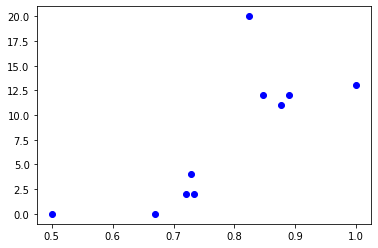

In [6]:
# print number of attributes per class that are normall distributed, and the precision across that class, 
#argueing that lower precision is associted with not being normally dist
i=0
xy = []

# for each class 
for prec in precisions:
    count = 0
    # calculate the count of gaussian distributed attributes
    for trio in PDFs[i]:
        if(trio[2] == 1):
            count+=1
    i+=1
     
    xy.append((prec, count))
    
x = []
y = []

# print precision vs number of gaussain distributed atrributes per class 
for tupl in xy:
    x.append(tupl[0])
    y.append(tupl[1])
    
p = plt.plot(x,y, 'bo')


### Q3
Implement a kernel density estimate (KDE) naive Bayes classifier and compare its performance to the Gaussian naive Bayes classifier. Recall that KDE has kernel bandwidth as a free parameter -- you can choose an arbitrary value for this, but a value in the range 5-25 is recommended. Discuss any differences you observe between the Gaussian and KDE naive Bayes classifiers. (As with the Gaussian naive Bayes, this KDE naive Bayes implementation should be your own and should not just call a pre-existing function.)

### Q4
Instead of using an arbitrary kernel bandwidth for the KDE naive Bayes classifier, use random hold-out or cross-validation to choose the kernel bandwidth. Discuss how this changes the model performance compared to using an arbitrary kernel bandwidth.

### Q5
Naive Bayes ignores missing values, but in pose recognition tasks the missing values can be informative. Missing values indicate that some part of the body was obscured and sometimes this is relevant to the pose (e.g., holding one hand behind the back). Are missing values useful for this task? Implement a method that incorporates information about missing values and demonstrate whether it changes the classification results.

### Q6
Engineer your own pose features from the provided keypoints. Instead of using the (x,y) positions of keypoints, you might consider the angles of the limbs or body, or the distances between pairs of keypoints. How does a naive Bayes classifier based on your engineered features compare to the classifier using (x,y) values? Please note that we are interested in explainable features for pose recognition, so simply putting the (x,y) values in a neural network or similar to get an arbitrary embedding will not receive full credit for this question. You should be able to explain the rationale behind your proposed features. Also, don't forget the conditional independence assumption of naive Bayes when proposing new features -- a large set of highly-correlated features may not work well.